In [1]:
# read dataset
from sklearn.datasets import load_wine
import pandas as pd

# load wine dataset from sklearn
wine = load_wine()

# convert to pandas DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [2]:
# EDA

print(f'5 data teratas:\n',df.head())
print(f'\nCek Missing Values:\n',df.isnull().sum())

5 data teratas:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

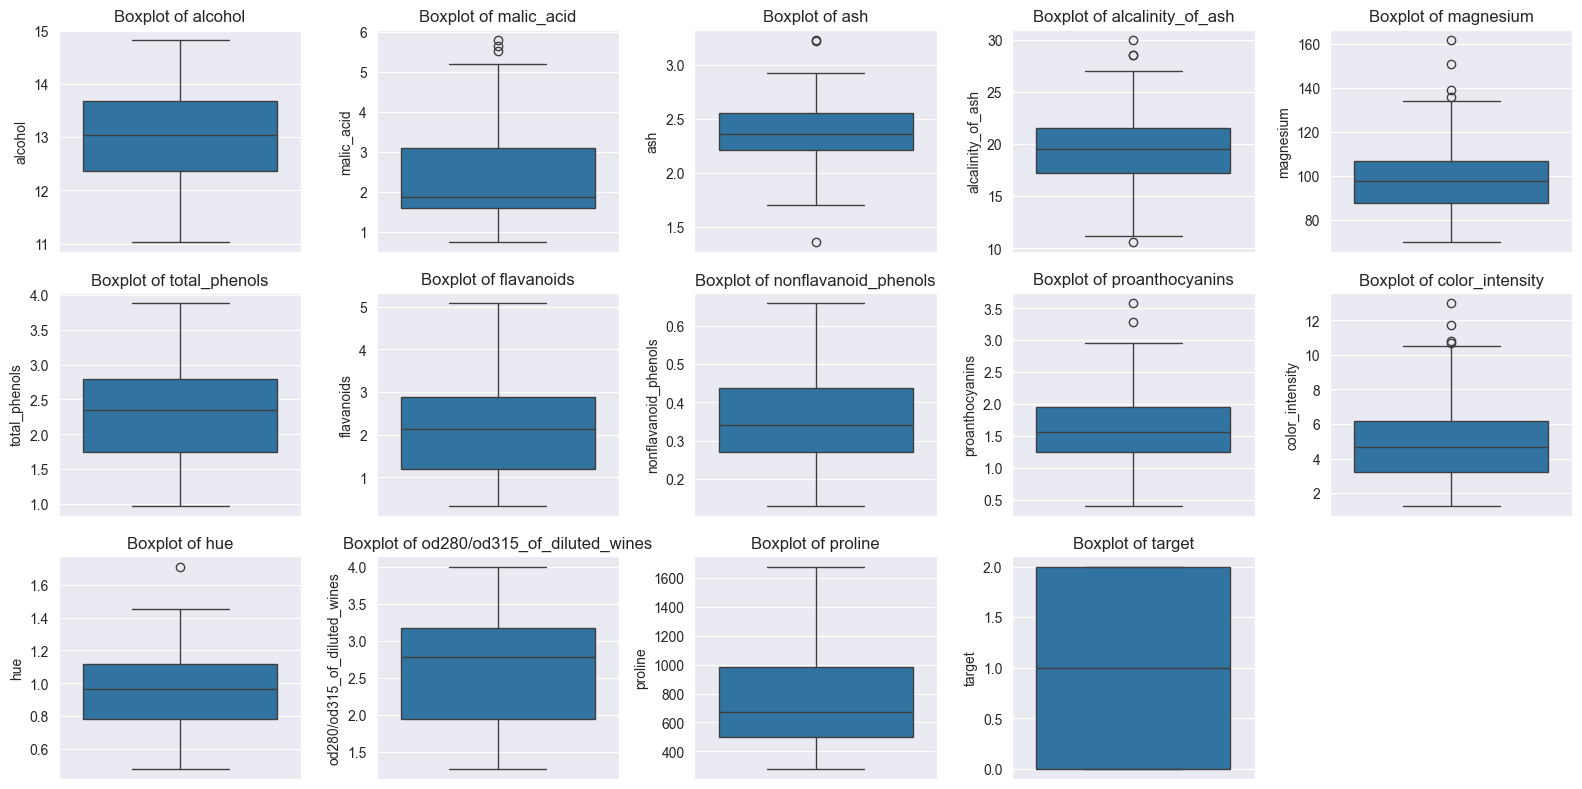

In [3]:
# Cek Outlier 
import seaborn as sns 
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for each feature in the dataframe
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [4]:
# Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# pisahkan X dan Y
X = df.drop(columns=['target'])
y = df['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [6]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



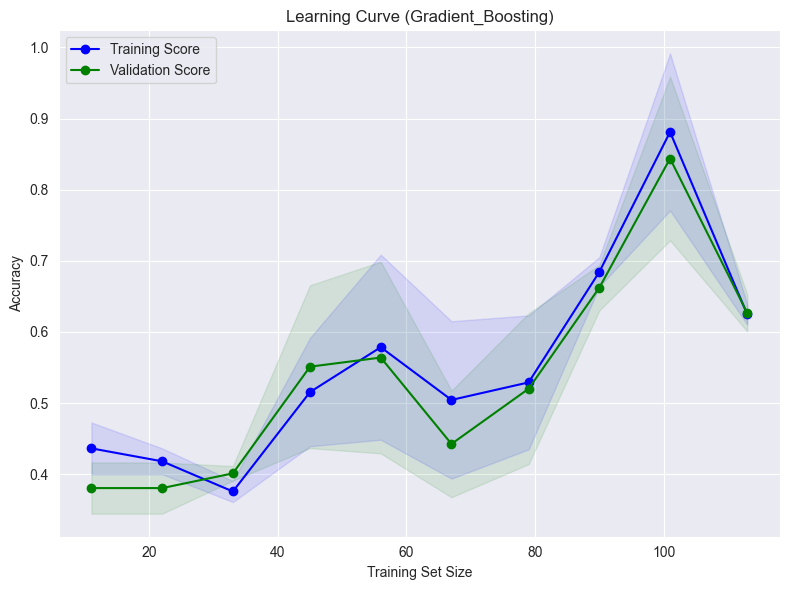

In [7]:
from sklearn.model_selection import learning_curve
from lightgbm import LGBMClassifier
import numpy as np
import matplotlib.pyplot as plt

# Gunakan LGBMClassifier agar bisa dipakai di learning_curve
model = LGBMClassifier(
    objective='multiclass',
    num_class=5,
    n_estimators=100,
    learning_rate=0.001,
    random_state=42
)

# Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Hitung rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Gradient_Boosting)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
